# numpy

[Numpy 공식문서]https://numpy.org/devdocs/

### 단점
- GPU 지원 안함
- Modern하지 못하다 ( 체계적x, mutable, 중복된거 많다)

### 장점
- 쉽고 편리 빠름(GPU X)
- vector, matrix 연산 위한 것

In [1]:
import numpy as np
type(np.ndarray)

type

In [2]:
type(np.ndarray.var)  # method descripter
# 철학적으로 다른 framework보다 property가 많음.

method_descriptor

In [5]:
for i in dir(np.ndarray):
    if not i.startswith('_'):
        if type(np.ndarray.var) != type(np.ndarray.__dict__[i]):
            print(i)

T
base
ctypes
data
dtype
flags
flat
imag
itemsize
nbytes
ndim
real
shape
size
strides


In [6]:
b = np.array([[1,2,3],[4,5,6]])
b.itemsize # 32bit / 8 = 4

4

In [10]:
next(b.flat)
# 내부적으로 numpy는 1차원이고 stride 개념으로 n차원으로 표현

1

In [24]:
dir(b.flat) # next있네

['__array__',
 '__class__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__next__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'base',
 'coords',
 'copy',
 'index']

In [25]:
list(b.flat) # 1차원 list

[1, 2, 3, 4, 5, 6]

In [26]:
b.data # 메모리 주소

In [11]:
b.data.obj

array([[1, 2, 3],
       [4, 5, 6]])

In [22]:
b.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

In [18]:
class X:
    def __repr__(self):
        return '객체 호출시'
    def __str__(self):
        return 'print호출'

In [19]:
x = X()

In [20]:
x

객체 호출시

In [21]:
print(x)

print호출


### vectorized 
- 속도적 측면에서 좋음
- loop없이 동시에 여러 개 연산하기

In [27]:
%%timeit
t=range(10000)
s=range(10000)
tmp=[]
for i,j in zip(t,s):
    tmp.append(i+j)

1.05 ms ± 19.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [28]:
%%timeit
x=np.arange(10000)
y=np.arange(10000)
x+y

19 µs ± 135 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [29]:
import tensorflow as tf

C:\Users\Gyu\Anaconda3\envs\py37\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Gyu\Anaconda3\envs\py37\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Gyu\Anaconda3\envs\py37\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [30]:
tf.config.experimental.list_logical_devices() # 사용 가능 자원

[LogicalDevice(name='/device:CPU:0', device_type='CPU'),
 LogicalDevice(name='/device:XLA_CPU:0', device_type='XLA_CPU')]

In [31]:
tf.config.experimental.list_physical_devices() # 있는 자원

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU'),
 PhysicalDevice(name='/physical_device:XLA_GPU:0', device_type='XLA_GPU')]

- homogeneous: 하나 데이터 타입 

- descriptor 기반 -> property가 많음

#### vector 
- 수식 이용, 확대축소해도 안 깨지지만 현실감 떨어짐

#### bitmap
- 점 하나를 별도로 독립적으로 처리, 현실적, 이미지 자체를  matrix, tensor로 인식

In [23]:
a = np.arange(24).reshape(2,3,4)
a

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [32]:
(X_train,y_train),(X_trest,y_test)= tf.keras.datasets.mnist.load_data()

In [38]:
X_train.shape

(60000, 28, 28)

In [33]:
x=np.array([1,2,3,4])    #1차원
xx=np.array([[1,2,3,4]]) # 2차원(matrix)
x[np.newaxis] #차원 추가 
x.reshape(1,4)

array([[1, 2, 3, 4]])

In [34]:
x.shape is xx.shape  #동일한 값인데 차원 다름

False

In [35]:
X_train_= X_train[0].reshape(28,28,1)
X_train_.shape

(28, 28, 1)

### array programming 

- 좌측 위를 (0,0) 기준으로 하면 행렬, 벡터가 매칭가능

- image (n,h,w,c)  channel last
- (n,c,h,w) - channel first 

- RGB + alpha 채널(투명)

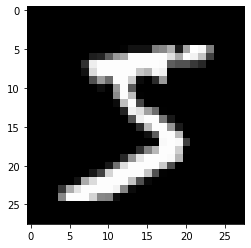

In [36]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0],cmap='gray')

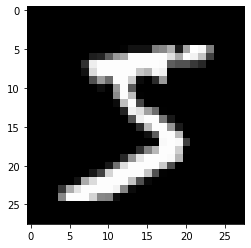

In [37]:
## minmaxscaling : 차이는 약간 있지만 신경망 특성상 0~1 사이로 하기

plt.imshow(X_train[0]/255,cmap='gray')